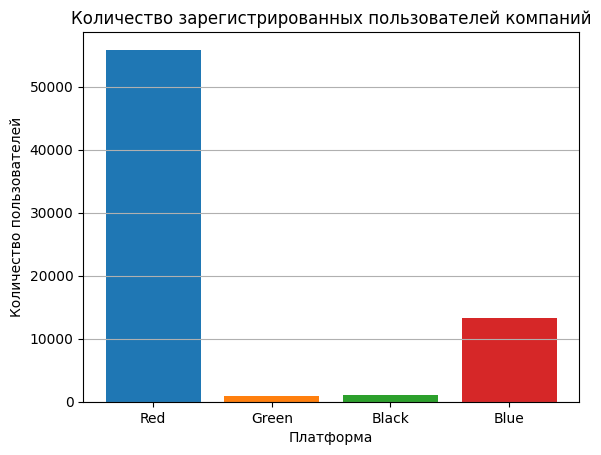

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel("Analytic_test.xlsx", sheet_name="Analytic_test", header=1, usecols='B:Y')

for col in df.columns:
    if col != 'HID':
        df[col] = pd.to_numeric(df[col], errors='coerce')

active_Red = df[df["active_Red"] != 0]
has_Green_id = df[df["has_Green_id"] != 0]
has_Black_id = df[df["has_Black_id"] != 0]
has_Blue_id = df[df["has_Blue_id"] != 0]

red_count = len(active_Red)
green_count = len(has_Green_id)
black_count = len(has_Black_id)
blue_count = len(has_Blue_id)

plt.bar("Red", red_count)
plt.bar("Green", green_count)
plt.bar("Black", black_count)
plt.bar("Blue", blue_count)
plt.grid (axis='y')
plt.title("Количество зарегистрированных пользователей компаний")
plt.xlabel("Платформа")
plt.ylabel("Количество пользователей")
plt.show()


На основе этого графика мы можем сделать вывод, что платформа Red самая популярная среди пользователей. После нее с большим отставанием идет платформа Blue. Green и Black по сравнению с двумя другими платформами почти не используются пользователями.

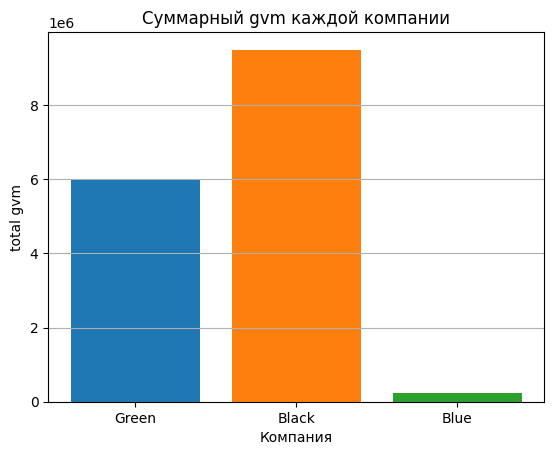

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel("Analytic_test.xlsx", sheet_name="Analytic_test", header=1, usecols='B:Y')

for col in df.columns:
    if col != 'HID':
        df[col] = pd.to_numeric(df[col], errors='coerce')

Blue_gmv_total = df["Blue_gmv_total"]
Green_gvm_total = df["Green_gvm_total"]
Black_gvm_total = df["Black_gvm_total"]

sum_blue = Blue_gmv_total.sum()
sum_green = Green_gvm_total.sum()
sum_black = Black_gvm_total.sum()


plt.bar("Green", sum_green)
plt.bar("Black", sum_black)
plt.bar("Blue", sum_blue)

plt.grid (axis='y')
plt.title("Суммарный gvm каждой компании")
plt.xlabel("Компания")
plt.ylabel("total gvm")
plt.show()


И хотя по gvm нельзя сделать определнных выводов, мы все равно можем ожидать, что выручка у платформы Black будет наибольшей. Приэтом любопытно заметить, что хотя у платформы Blue больше всего пользователей по сравнению с Green и Black, total gvm у нее меньше всех. По платформе Red информации о gvm нет.

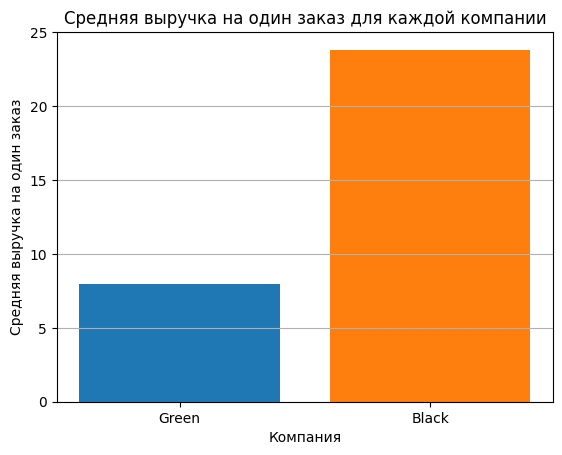

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("Analytic_test.xlsx", sheet_name="Analytic_test", header=1, usecols='B:Y')

for col in df.columns:
    if col != 'HID':
        df[col] = pd.to_numeric(df[col], errors='coerce')

Green = df[["Green_gvm_total", "Green_gvm_order_count"]]
Black = df[["Black_gvm_total", "Black_gvm_order_count"]]

y_1 = (df["Green_gvm_total"] / df["Green_gvm_order_count"]).fillna(0).mean()
y_2 = (df["Black_gvm_total"] / df["Black_gvm_order_count"]).fillna(0).mean()


plt.bar("Green", y_1)
plt.bar("Black", y_2)
plt.title("Средняя выручка на один заказ для каждой компании")
plt.grid (axis='y')
plt.xlabel("Компания")
plt.ylabel("Средняя выручка на один заказ")
plt.show()


Платформа Black в целом более успешна в получении выручки на один заказ, чем компания Green, поскольку и средняя выручка, и суммарный gvm у компании Black больше, чем у компании Green. Также можно предположить, что у компании Black более высокая цена на свои товары/услуги, что влияет на среднюю выручку на один заказ.

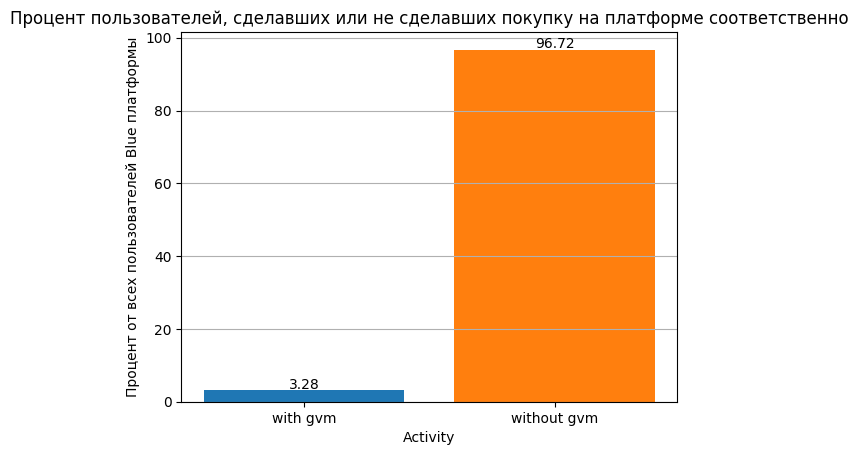

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("Analytic_test.xlsx", sheet_name="Analytic_test", header=1, usecols='B:Y')

for col in df.columns:
    if col != 'HID':
        df[col] = pd.to_numeric(df[col], errors='coerce')

has_Blue_id = df["has_Blue_id"]

var_1 = len(df[((df["Blue_gmv_total"] != 0) & (df["Blue_activity_count"] != 0))])
var_3 = has_Blue_id.sum()

x_1 = round(var_1 / var_3 * 100, 2)
x_2 = 100 - x_1

y = [x_1, x_2]

plt.bar("with gvm", x_1)
plt.bar("without gvm", x_2)
plt.title("Процент пользователей, сделавших или не сделавших покупку на платформе соответственно")
plt.grid (axis='y')
plt.xlabel("Aсtivity")
plt.ylabel("Процент от всех пользователей Blue платформы")

for i, v in enumerate(y):
    plt.text(i, v + 0.4, str(v), ha="center")

plt.show()


На диаграмме видно, что пользователей, которые делают покупку, гораздо меньше по отношению к тем, кто не делает.  Это может быть связано с разными факторами, например, неудобством интерфейса, недостаточным выбором товаров или высокой конкуренцией на платформе. 

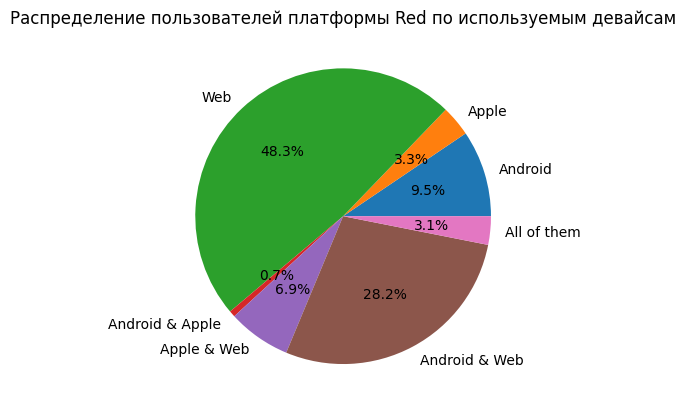

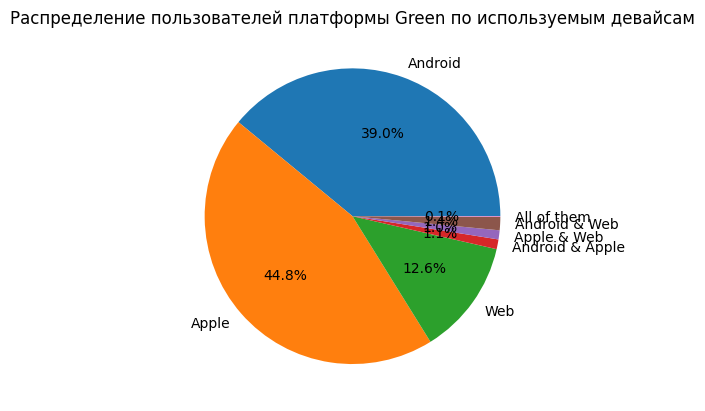

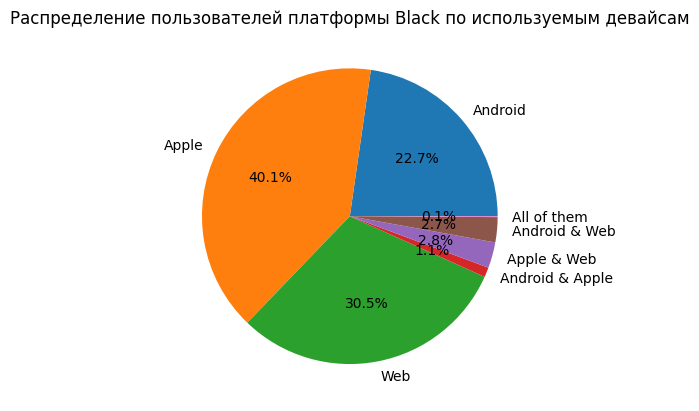

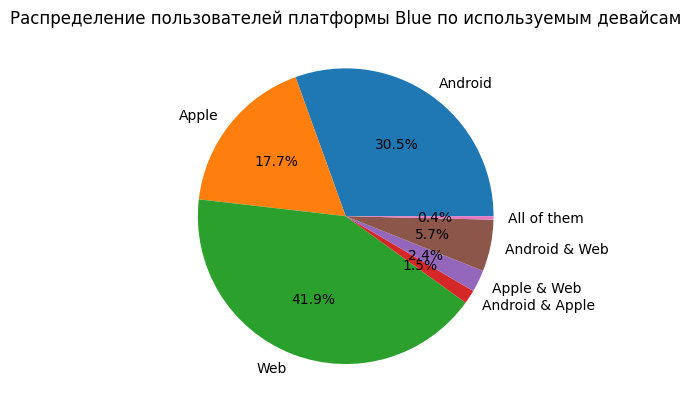

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def fn(col_a, col_b, col_c):
    len_a = len(df[((df[col_a] != 0) & (df[col_b] == 0)) & (df[col_c] == 0)])
    len_b = len(df[((df[col_a] == 0) & (df[col_b] != 0)) & (df[col_c] == 0)])
    len_c = len(df[((df[col_a] == 0) & (df[col_b] == 0)) & (df[col_c] != 0)])

    len_ab = len(df[((df[col_a] != 0) & (df[col_b] != 0)) & (df[col_c] == 0)])
    len_bc = len(df[((df[col_a] == 0) & (df[col_b] != 0)) & (df[col_c] != 0)])
    len_ac = len(df[((df[col_a] != 0) & (df[col_b] == 0)) & (df[col_c] != 0)])

    len_all = len(df[((df[col_a] * df[col_b] * df[col_c]) != 0)])
    l = [len_a, len_b, len_c, len_ab, len_bc, len_ac, len_all]
    return l


df = pd.read_excel("Analytic_test.xlsx", sheet_name="Analytic_test", header=1, usecols='B:Y')

for col in df.columns:
    if col != 'HID':
        df[col] = pd.to_numeric(df[col], errors='coerce')

Red = df[df["active_Red"] == 1]
Red_n = df[["Red_android", "Red_apple", "Red_web"]]

Green = df[df["has_Green_id"] == 1]
Green_n = df[["Green_android", "Green_apple", "Green_web"]]

Black = df[df["has_Black_id"] == 1]
Black_n = df[["Black_android", "Black_apple", "Black_web"]]

Blue = df[df["has_Blue_id"] == 1]
Blue_n = df[["Blue_android", "Blue_apple", "Blue_web"]]


vals_r = fn("Red_android", "Red_apple", "Red_web")
labels = ["Android", "Apple", "Web", "Android & Apple", "Apple & Web", "Android & Web", "All of them"]
fig_1, ax_1 = plt.subplots()
plt.pie(vals_r, labels=labels, autopct='%1.1f%%')
plt.title("Распределение пользователей платформы Red по используемым девайсам")
plt.show()

vals_g = fn("Green_android", "Green_apple", "Green_web")
labels = ["Android", "Apple", "Web", "Android & Apple", "Apple & Web", "Android & Web", "All of them"]
fig_2, ax_2 = plt.subplots()
plt.pie(vals_g, labels=labels, autopct='%1.1f%%')
plt.title("Распределение пользователей платформы Green по используемым девайсам")
plt.show()

vals_black = fn("Black_android", "Black_apple", "Black_web")
labels = ["Android", "Apple", "Web", "Android & Apple", "Apple & Web", "Android & Web", "All of them"]
fig_3, ax_3 = plt.subplots()
plt.pie(vals_black, labels=labels, autopct='%1.1f%%')
plt.title("Распределение пользователей платформы Black по используемым девайсам")
plt.show()

vals_blue = fn("Blue_android", "Blue_apple", "Blue_web")
labels = ["Android", "Apple", "Web", "Android & Apple", "Apple & Web", "Android & Web", "All of them"]
fig_4, ax_4 = plt.subplots()
plt.pie(vals_blue, labels=labels, autopct='%1.1f%%')
plt.title("Распределение пользователей платформы Blue по используемым девайсам")
plt.show()


Платформы Red и Blue, скорее всего обладают самой удобной web-версией платформы, поскольку большинство пользователей используют именно их. Для этих платформ, где большинство пользователей использует web-версию, можно сделать акцент на разработку и улучшение функционала web-версии. Для Green и Black, где большинство пользователей использует Apple девайсы, можно делать акцент на разработку и улучшение мобильных приложений для iOS. В целом, зная предпочтения пользователей по использованию платформ, можно более точно настроить маркетинговые кампании и улучшить пользовательский опыт на соответствующих платформах. (P.S. да, код выглядит жутко страшно...)

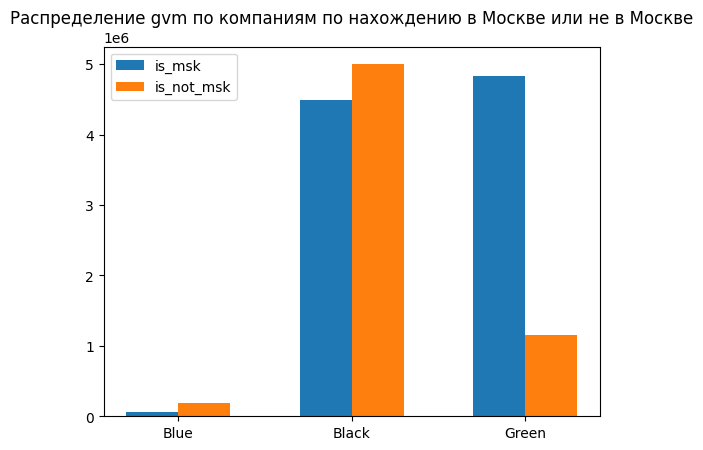

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("Analytic_test.xlsx", sheet_name="Analytic_test", header=1, usecols='B:Y')

for col in df.columns:
    if col != 'HID':
        df[col] = pd.to_numeric(df[col], errors='coerce')

Blue = df[(df["has_Blue_id"] == 1)]
blue_sum_m = df.loc[df["is_msk"] == 1, "Blue_gmv_total"].sum()
blue_sum_nm = df.loc[df["is_msk"] != 1, "Blue_gmv_total"].sum()

Black = df[(df["has_Black_id"] == 1)]
black_sum_m = df.loc[df["is_msk"] == 1, "Black_gvm_total"].sum()
black_sum_nm = df.loc[df["is_msk"] != 1, "Black_gvm_total"].sum()

Green = df[(df["has_Green_id"] == 1)]
green_sum_m = df.loc[df["is_msk"] == 1, "Green_gvm_total"].sum()
green_sum_nm = df.loc[df["is_msk"] != 1, "Green_gvm_total"].sum()

labels = ["Blue", "Black", "Green"]
g1 = [blue_sum_m, black_sum_m, green_sum_m]
g2 = [blue_sum_nm, black_sum_nm, green_sum_nm]
width = 0.3
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = plt.bar(x - width/2, g1, width, label='is_msk')
rects2 = plt.bar(x + width/2, g2, width, label='is_not_msk')
plt.title("Распределение gvm по компаниям по нахождению в Москве или не в Москве")
plt.xticks(x)
plt.xticks(range(len(labels)), labels)
plt.legend()
plt.show()


Можно предположить, что компании Black и Green имеют различные стратегии и подходы к работе на разных рынках, что может влиять на различия в выручке. Также, это может свидетельствовать о различной популярности и узнаваемости этих компаний в разных регионах.

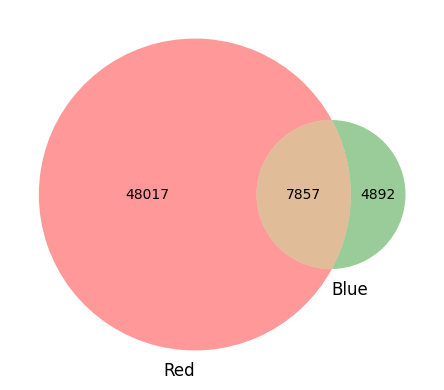

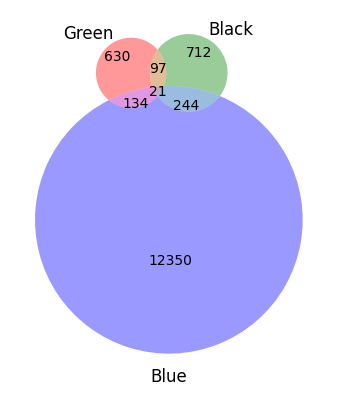

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2

# Создаем множества


df = pd.read_excel("Analytic_test.xlsx", sheet_name="Analytic_test", header=1, usecols='B:Y')

for col in df.columns:
    if col != 'HID':
        df[col] = pd.to_numeric(df[col], errors='coerce')

set0 = set(df[df["active_Red"] == 1].index)
set1 = set(df[df["has_Green_id"] == 1].index)
set2 = set(df[df["has_Black_id"] == 1].index)
set3 = set(df[df["has_Blue_id"] == 1].index)

venn2([set0, set3], ["Red", "Blue"])
plt.show()

venn3([set1, set2, set3], ["Green", "Black", "Blue"])
plt.show()


На основе этих диаграмм видно, что для компании Blue основное количество пользователей являются юзерами в компании Red тоже, то есть компанию Blue на данном этапе можно не считать сильным конкурентом для компании Red. Но проанализировав, почему именно в компании Red так много пользователей, можно предположить точки роста для платформы Blue. С другой стороны, компания Red может увидеть в этом соотношении толчок на сотрудничество с компанией Blue.

По другому графику можно сказать, что Green и Black не являются конкурентами для Blue. У Green и Black мало общих пользователей в сравнении с их общим количеством пользователей. Маркетинговые кампании этих платформ могут быть улучшены (возможно в пользу их объединения). Также стоит обратить внимание на разницу в популярности платформ (Android, Apple или Web) у пользователей этих компаний и использовать эту информацию для таргетирования рекламных компаний на более подходящих платформах.